In [11]:
import pandas as pd

df = pd.read_csv('Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [12]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


### Business Understanding
- 통신사 고객 관리
- 고객의 인원수가 가장 중요함
- 기존 고객 이탈 방지, 신규 고객 유치
- 고객 이탈과 가장 관련 있는 요인이 무엇인지 확인

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [14]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [16]:
df.sort_values(by='TotalCharges')['TotalCharges']  # 숫치형 데이터가 아닌것이 존재함.

936           
3826          
4380          
753           
5218          
         ...  
6646    997.75
5598     998.1
3686    999.45
3353     999.8
2845     999.9
Name: TotalCharges, Length: 7043, dtype: object

In [17]:
df.sort_values(by='TotalCharges')['TotalCharges'][936] # 빈칸 확인

' '

In [18]:
df.loc[df['TotalCharges'] == ' ']['TotalCharges']  # 빈칸 찾기

488      
753      
936      
1082     
1340     
3331     
3826     
4380     
5218     
6670     
6754     
Name: TotalCharges, dtype: object

In [19]:
len(df.loc[df['TotalCharges'] == ' ']['TotalCharges'])

11

### 빈 값 처리 방법
- 그냥 지우기
- 도메인 지식을 이용해 채워 넣기
- 평균 대체법

In [20]:
df.loc[df['TotalCharges'] == ' ']    # 이렇게 처리하ㅕㄴ 안됨

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


### 빈 값 처리 방법
- 그냥 지우기
- 도메인 지식을 이용해 채워 넣기
- 평균 대체법
- 해당 column을 label로 두고, ML 학습한 후 예측값으로 빈값을 채워 넣기

In [21]:
df['SeniorCitizen'].describe()

count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: SeniorCitizen, dtype: float64

In [22]:
# Dependents는 대표성이 있는가 ?
# 부양 가족이 있는 고객은 모두 TotalCharges가 빈칸인가 ?

df.loc[df['Dependents'] == 'Yes']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No
10,9763-GRSKD,Male,0,Yes,Yes,13,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,49.95,587.45,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
17,9959-WOFKT,Male,0,No,Yes,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,Yes,Two year,No,Bank transfer (automatic),106.70,7382.25,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7018,1122-JWTJW,Male,0,Yes,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,70.65,70.65,Yes
7020,9837-FWLCH,Male,0,Yes,Yes,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Electronic check,19.20,239,No
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


In [23]:
len(df.loc[df['Dependents'] == 'Yes'])

2110

In [24]:
# tenure는 대표성이 있는가 ?

df.loc[df['tenure'] == 0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [25]:
df.loc[df['tenure'] == 0, 'TotalCharges'] = 0
df['TotalCharges'] = df['TotalCharges'].apply(lambda x: float(x)) # object type -> folat type으로 변경
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [26]:
set(df['Churn'])

{'No', 'Yes'}

In [27]:
mapper = {
    'Yes': 1, 
    'No': 0
}

In [28]:
df['Churn_num'] = df['Churn'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [29]:
len(set(df['tenure']))

73

In [30]:
# 평균값으로 대체
te_ch = df.groupby('tenure').agg({'Churn_num': 'mean'}).reset_index()
te_ch

,tenure,Churn_num
0,0,0.000000
1,1,0.619902
2,2,0.516807
3,3,0.470000
4,4,0.471591
...,...,...
68,68,0.090000
69,69,0.084211
70,70,0.092437
71,71,0.035294


In [31]:
import seaborn as sns

<Axes: xlabel='tenure', ylabel='Churn_num'>

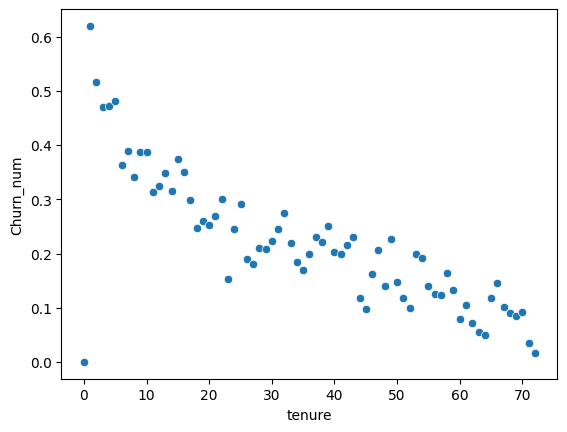

In [32]:
sns.scatterplot(data=te_ch, x='tenure', y='Churn_num')

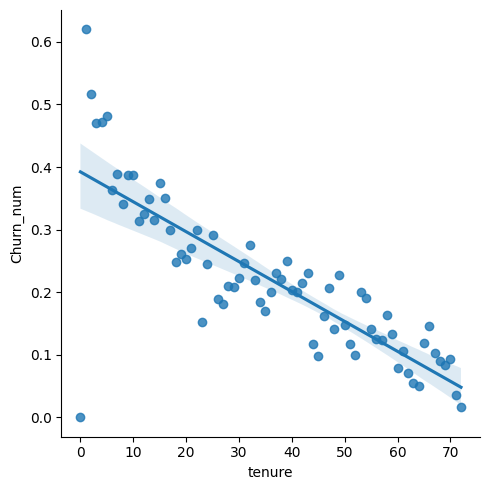

In [33]:
sns.lmplot(data=te_ch, x='tenure', y='Churn_num')  # 산점도 추세선 그래프

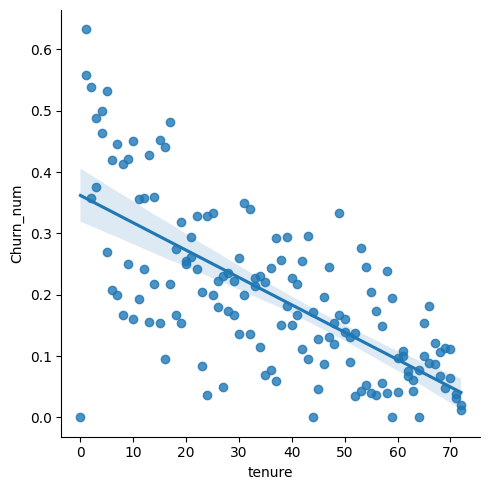

In [34]:
te_ch = df.groupby(['tenure', 'Dependents']).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num')  # 산점도 추세선 그래프

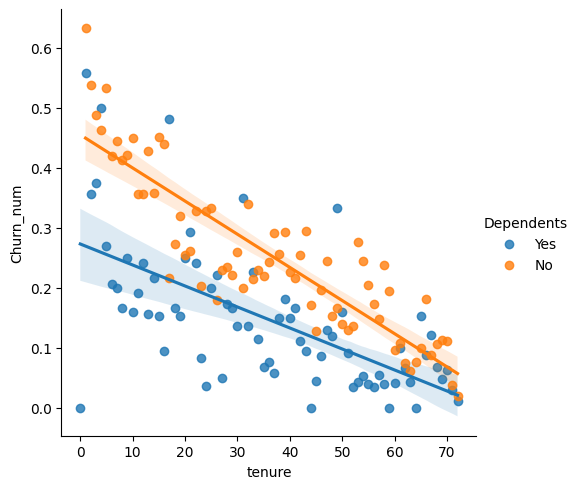

In [35]:
hue = 'Dependents'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

In [36]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

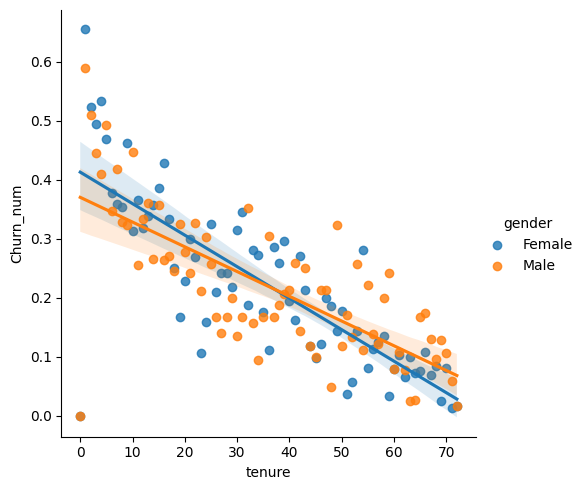

In [37]:
hue = 'gender'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

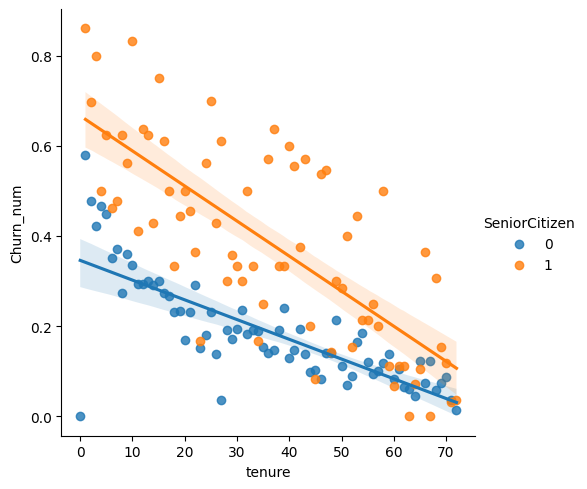

In [38]:
hue = 'SeniorCitizen'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

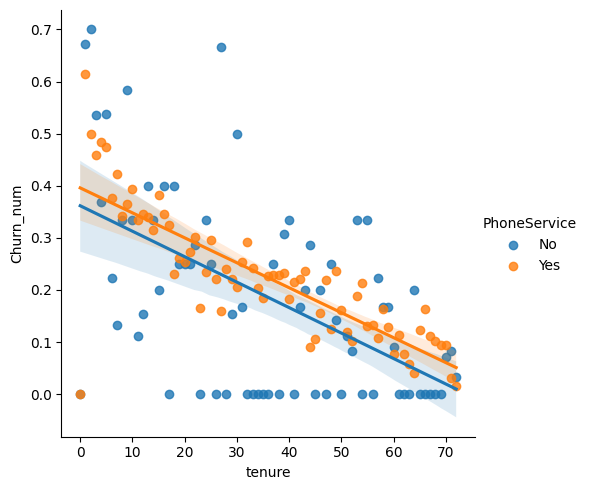

In [39]:
hue = 'PhoneService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

In [40]:
df.loc[df['tenure'] == 32]['PhoneService']

107      No
174     Yes
253     Yes
306     Yes
340     Yes
       ... 
6420    Yes
6440    Yes
6822    Yes
6881     No
6949     No
Name: PhoneService, Length: 69, dtype: object

In [41]:
df.loc[df['tenure'] == 32]['PhoneService'].value_counts()

PhoneService
Yes    65
No      4
Name: count, dtype: int64

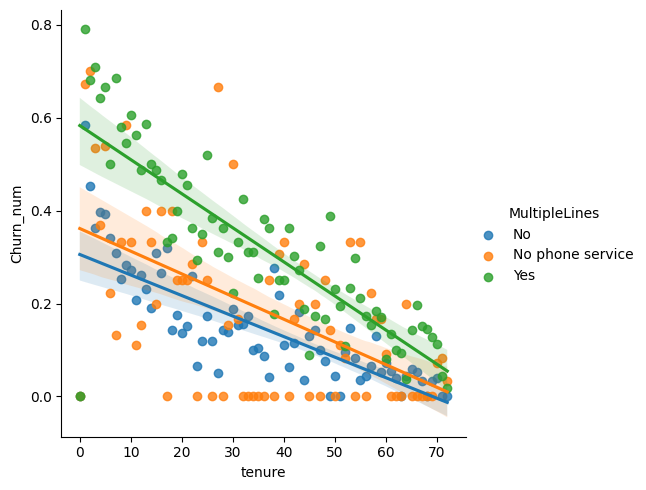

In [42]:
hue = 'MultipleLines'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

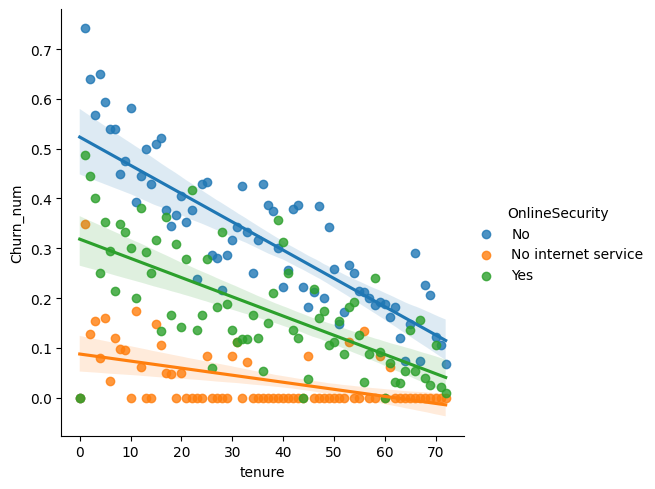

In [43]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

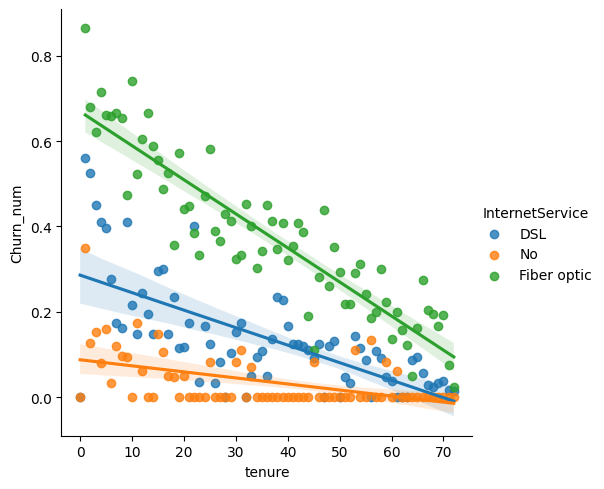

In [44]:
hue = 'InternetService'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

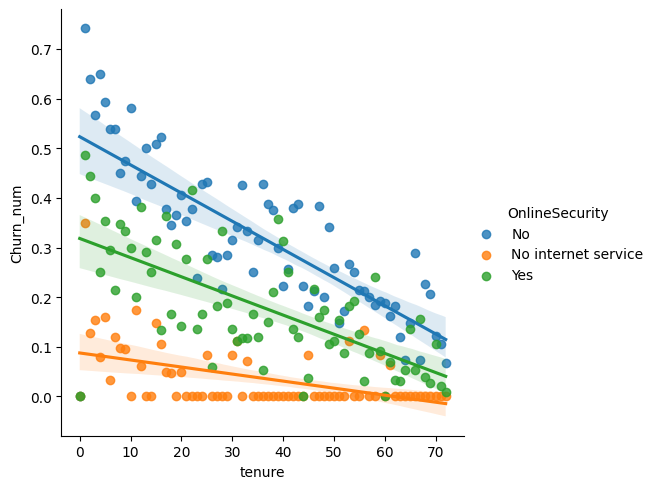

In [45]:
hue = 'OnlineSecurity'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

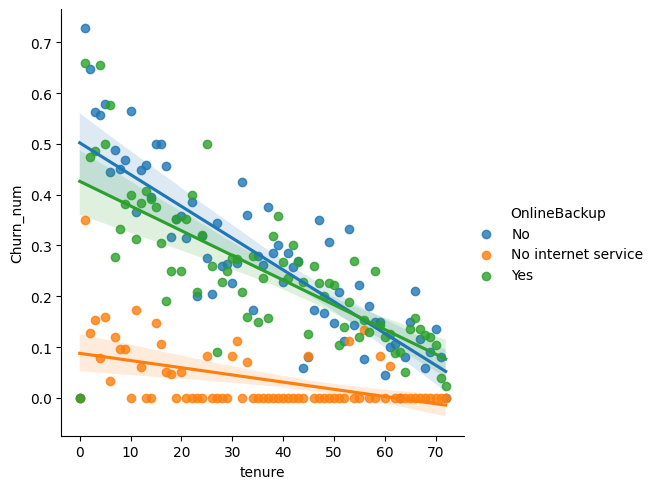

In [46]:
hue = 'OnlineBackup'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

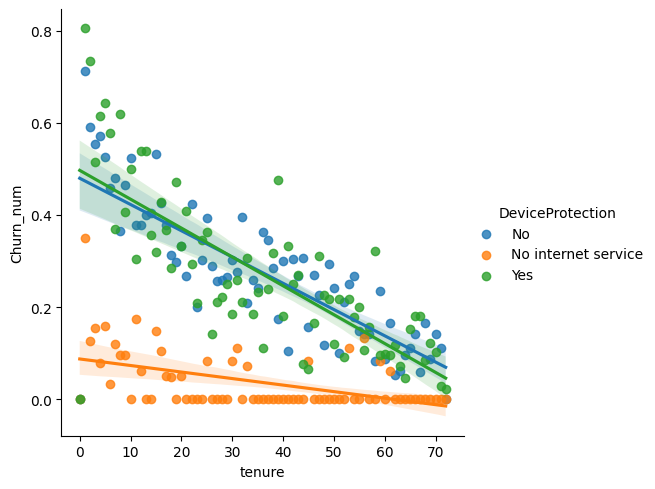

In [47]:
hue = 'DeviceProtection'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

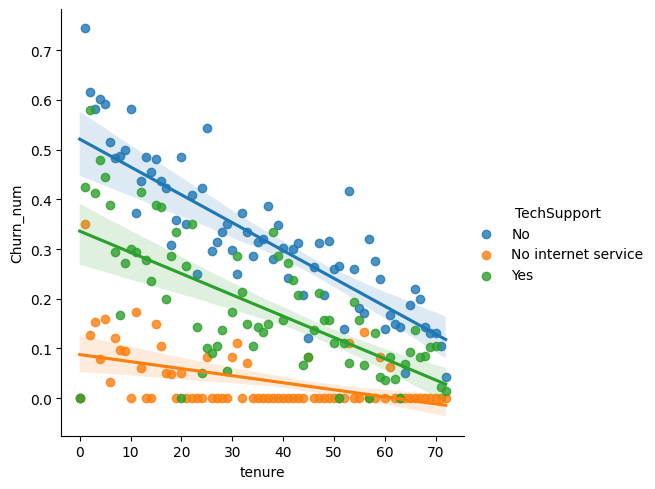

In [48]:
hue = 'TechSupport'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

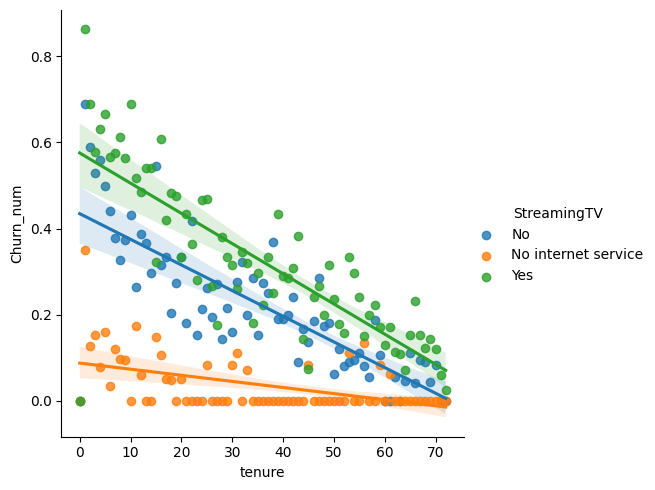

In [49]:
hue = 'StreamingTV'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

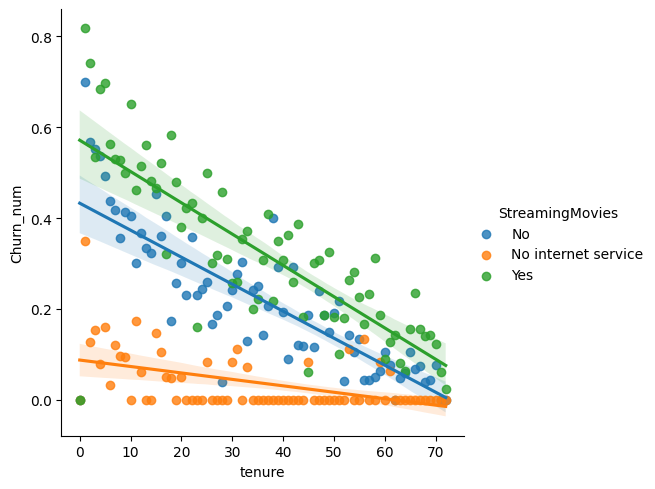

In [50]:
hue = 'StreamingMovies'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

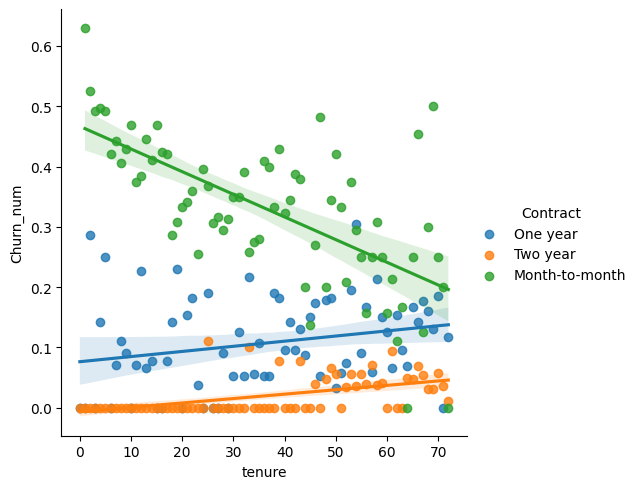

In [51]:
hue = 'Contract'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

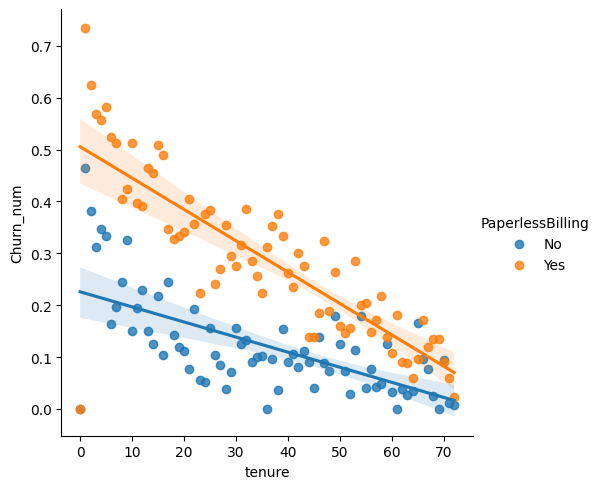

In [52]:
hue = 'PaperlessBilling'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

In [53]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Churn_num'],
      dtype='object')

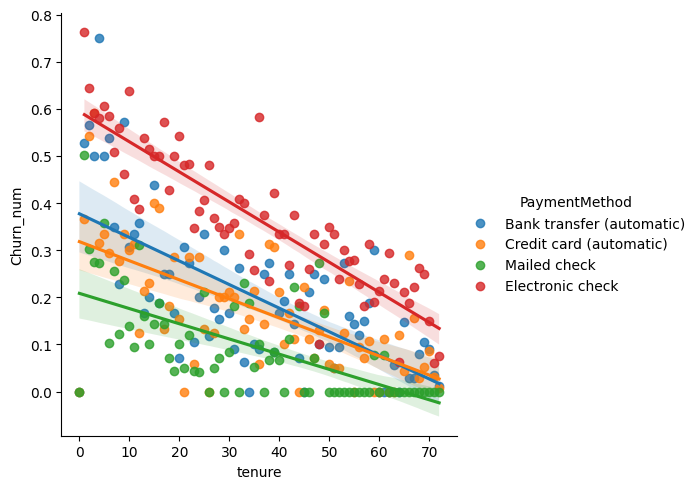

In [54]:
hue = 'PaymentMethod'
te_ch = df.groupby(['tenure', hue]).agg({'Churn_num': 'mean'}).reset_index()
te_ch

sns.lmplot(data=te_ch, x='tenure', y='Churn_num', hue=hue)  # 산점도 추세선 그래프

### Data Preparation
- 이상치 판별과 처리
- scaling : 범위를 조정 
- 경우의 수 column 처리
- 교차 검증 

### 이상치 (Outlier)
- 기준을 정해서 기준선 밖에 잇으면 이상치로 판단
- IQR(inter Quartile Range), MAD, MCOD, Hoteling's T2, SPE  : MAD, MCOD, Hoteling's T2, SPE 난이도가 있음

In [55]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370
std,0.368612,24.559481,30.090047,2266.794470,0.441561
min,0.000000,0.000000,18.250000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


In [56]:
tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

In [57]:
IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5는 학술적인 상수
upper_lim = desc['75%']  + IQR
lower_lim = desc['25%'] - IQR

In [58]:
df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)] # 이상치 확인

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num


In [59]:
tgt_col = 'SeniorCitizen'
desc = df.describe()[tgt_col]

IQR = 1.5 * (desc['75%'] - desc['25%'])   # 1.5는 학술적인 상수
upper_lim = desc['75%'] + IQR
lower_lim = desc['25%'] - IQR

df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)]  # 이상치 확인

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Churn_num
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes,1
30,3841-NFECX,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,...,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,No,0
31,4929-XIHVW,Male,1,Yes,No,2,Yes,No,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,No,0
34,3413-BMNZE,Male,1,No,No,1,Yes,No,DSL,No,...,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,No,0
50,8012-SOUDQ,Female,1,No,No,43,Yes,Yes,Fiber optic,No,...,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,No,0
7029,2235-DWLJU,Female,1,No,No,6,No,No phone service,DSL,No,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,No,0
7031,3605-JISKB,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,...,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,No,0
7032,6894-LFHLY,Male,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,Yes,1


In [60]:
# TotalCharge를 대상으로 평균으로부터 표준편차 2.5에 해당하는 값들의 합

tgt_col = 'TotalCharges'
desc = df.describe()[tgt_col]

upper_lim = desc['mean'] + (2.5 * desc['std']) 
lower_lim = desc['mean'] - (2.5 * desc['std']) 

sum(df.loc[(df[tgt_col] > upper_lim) | (df[tgt_col] < lower_lim)][tgt_col])  

740692.15

### scaling
- 변수의 범위를 조정해주는 것
- 단위가 큰 column이 단위가 작은 column에 비해 학습 단계에 미치는 영향이 큰 경우
- 그래프를 그릴때, 같은 축을 공유해 시각화 하는 경우
- 자릿수가 작아야 속도가 빠른 경우

- min-max > standart > robust  : 이상치를 고려하지 않음. 이상치가 있는 경우 min-max를 추천하지 않음
- robust는 이상치의 영향을 덜 받음.

In [61]:
minus_min = df['tenure'] - min(df['tenure'])
minus_min.min()

np.int64(0)

In [62]:
scaled = minus_min / max(minus_min)
scaled.describe()

count    7043.000000
mean        0.449599
std         0.341104
min         0.000000
25%         0.125000
50%         0.402778
75%         0.763889
max         1.000000
Name: tenure, dtype: float64

In [63]:
# tenure, MonthlyCharges, TotalCharges
# tenure_mm_scal, MonthlyCharges_mm_scal, TotalCharges_mm_scal

scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_min = df[tgt_col] - min(df[tgt_col])
    df[tgt_col + '_mm_scal'] = minus_min / max(minus_min)

df[['tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal']].describe()

,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal
count,7043.000000,7043.000000,7043.000000
mean,0.449599,0.462803,0.262497
std,0.341104,0.299403,0.261007
min,0.000000,0.000000,0.000000
25%,0.125000,0.171642,0.045891
50%,0.402778,0.518408,0.160574
75%,0.763889,0.712438,0.436003
max,1.000000,1.000000,1.000000


In [64]:
import numpy as np

In [65]:
scal_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

for tgt_col in scal_cols:
    minus_mean = df[tgt_col] - np.mean(df[tgt_col])
    df[tgt_col + '_std_scal'] = minus_mean / np.std(minus_mean)

df[['tenure_std_scal', 'MonthlyCharges_std_scal', 'TotalCharges_std_scal']].describe()

,tenure_std_scal,MonthlyCharges_std_scal,TotalCharges_std_scal
count,7.043000e+03,7.043000e+03,7.043000e+03
mean,-2.421273e-17,-6.406285e-17,-3.783239e-17
std,1.000071e+00,1.000071e+00,1.000071e+00
min,-1.318165e+00,-1.545860e+00,-1.005780e+00
25%,-9.516817e-01,-9.725399e-01,-8.299464e-01
50%,-1.372744e-01,1.857327e-01,-3.905282e-01
75%,9.214551e-01,8.338335e-01,6.648034e-01
max,1.613701e+00,1.794352e+00,2.825806e+00


In [66]:
print(-2.421273e-17)

-2.421273e-17


### 경우의수 column 처리

In [67]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Churn_num',
       'tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal',
       'tenure_std_scal', 'MonthlyCharges_std_scal', 'TotalCharges_std_scal'],
      dtype='object')

In [68]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [69]:
set(df['Partner'])

{'No', 'Yes'}

In [70]:
set(df['Dependents'])

{'No', 'Yes'}

In [71]:
set(df['PhoneService'])

{'No', 'Yes'}

In [72]:
set(df['PaperlessBilling'])

{'No', 'Yes'}

In [73]:
# 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling'
# e.g, 'Partner' -> 'Partner_num'

yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

for tgt in yes_no_col:
    mapper = { 'No': 0, 'Yes': 1 }
    df[tgt + '_num'] = df[tgt].map(mapper)

df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [74]:
set(df['InternetService'])

# 인터넷 속도 + 서비스 이용료

{'DSL', 'Fiber optic', 'No'}

In [75]:
mapper = {'No' : 0, 'DSL' : 0.5, 'Fiber optic' : 1}
df['InternetSpeed'] = df['InternetService'].map(mapper)
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn_num,tenure_mm_scal,MonthlyCharges_mm_scal,TotalCharges_mm_scal,tenure_std_scal,MonthlyCharges_std_scal,TotalCharges_std_scal,Partner_num,Dependents_num,PhoneService_num,PaperlessBilling_num,InternetSpeed
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7.043000e+03,7.043000e+03,7.043000e+03,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,0.265370,0.449599,0.462803,0.262497,-2.421273e-17,-6.406285e-17,-3.783239e-17,0.483033,0.299588,0.903166,0.592219,0.611458
std,0.368612,24.559481,30.090047,2266.794470,0.441561,0.341104,0.299403,0.261007,1.000071e+00,1.000071e+00,1.000071e+00,0.499748,0.458110,0.295752,0.491457,0.389438
min,0.000000,0.000000,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.318165e+00,-1.545860e+00,-1.005780e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,9.000000,35.500000,398.550000,0.000000,0.125000,0.171642,0.045891,-9.516817e-01,-9.725399e-01,-8.299464e-01,0.000000,0.000000,1.000000,0.000000,0.500000
50%,0.000000,29.000000,70.350000,1394.550000,0.000000,0.402778,0.518408,0.160574,-1.372744e-01,1.857327e-01,-3.905282e-01,0.000000,0.000000,1.000000,1.000000,0.500000
75%,0.000000,55.000000,89.850000,3786.600000,1.000000,0.763889,0.712438,0.436003,9.214551e-01,8.338335e-01,6.648034e-01,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.613701e+00,1.794352e+00,2.825806e+00,1.000000,1.000000,1.000000,1.000000,1.000000


In [76]:
df.describe().columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges',
       'Churn_num', 'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'tenure_std_scal', 'MonthlyCharges_std_scal',
       'TotalCharges_std_scal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed'],
      dtype='object')

In [77]:
interested = ['SeniorCitizen', 'Churn_num', 
       'tenure_mm_scal', 'MonthlyCharges_mm_scal',
       'TotalCharges_mm_scal', 'Partner_num', 'Dependents_num',
       'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
df[interested].to_csv('test3_modify.csv', index=False)

In [78]:
df = pd.read_csv('test3_modify.csv')
df.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Churn_num,0.000000,0.000000,1.000000,0.000000,1.000000
tenure_mm_scal,0.013889,0.472222,0.027778,0.625000,0.027778
MonthlyCharges_mm_scal,0.115423,0.385075,0.354229,0.239303,0.521891
TotalCharges_mm_scal,0.003437,0.217564,0.012453,0.211951,0.017462
Partner_num,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_num,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_num,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBilling_num,1.000000,0.000000,1.000000,0.000000,1.000000
InternetSpeed,0.500000,0.500000,0.500000,0.500000,1.000000


In [79]:
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed'],
      dtype='object')

In [80]:
features= ['SeniorCitizen',
       'tenure_mm_scal', 'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 
       'Partner_num', 'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num', 'InternetSpeed']
label = 'Churn_num'

In [81]:
X, y = df[features], df[label]

In [82]:
X.shape

(7043, 9)

In [83]:
y.shape

(7043,)

### 교차검증

- test 셋이 너무 적으면 학습된 결과가 불안정함 -> 교차검증을 이용해 안정적인 검증 점수를 획득
- train 셋을 조금씩 떼어내 평가하는 과정을 여러 번 반복하고 점수를 평균내서 최종 검증 점수 획득

### 교차검증 순서

1. row의 순서를 섞음
2. 데이터셋을 k 등분(k-fold cross validation)
3. 첫 번째 데이터셋을 test(검증용)로, 나머지를 train(학습용)으로 사용
4. train 데이터로 학습하고, test 데이터로 채점 -> 점수 확인
5. 두 번째 데이터셋을 test로 하고 3, 4 단계를 k번 반복
6. 평가지표 점수가 k개 생김 -> 평균(cv-score)


In [84]:
from sklearn.model_selection import cross_val_score as cvs
from sklearn.ensemble import RandomForestClassifier as rf
import numpy as np

In [ ]:
# 5등분해서 반복 학습
# 평가 기준은 scoring='precision'
# cross_val_score: 교차검증할 때 쓰임

model = rf()
cvs(model, X, y, scoring='precision', cv=5)

array([0.56521739, 0.59866221, 0.58455882, 0.60273973, 0.61386139])

In [86]:
np.mean(cvs(model, X, y, scoring='precision', cv=5))

np.float64(0.5948199373044734)

### 지도 / 비지도 학습
- 지도 (Supervised) 학습
    - 정답이 있는 데이터로 학습하는 방식
    - feature - label 관계 패턴 하습
    - 사례 : 분류, 회귀
-----------
- 비지도(Unsupervised) 학습
    - 정답이 없는 데이터로 학습하는 방식
    - feature간 관계 패턴 학습
    - 비지도 학습의 알고리즘들은 목적이 정해져 있음.
    - 사례: 군집화, 차원 축소

### 군집(Clustering) 알고리즘
- 데이터를 여러 그룹으로 묶음(유사한 row끼리 그룹화)

In [ ]:
from sklearn.cluster import KMeans
# KMeans: 비지도 학습 기법중 하나

In [88]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(n_clusters=4)

In [89]:
model.labels_

array([3, 2, 0, ..., 1, 3, 0], shape=(7043,), dtype=int32)

In [90]:
df['cluster'] = model.labels_
df.head().T

,0,1,2,3,4
SeniorCitizen,0.000000,0.000000,0.000000,0.000000,0.000000
Churn_num,0.000000,0.000000,1.000000,0.000000,1.000000
tenure_mm_scal,0.013889,0.472222,0.027778,0.625000,0.027778
MonthlyCharges_mm_scal,0.115423,0.385075,0.354229,0.239303,0.521891
TotalCharges_mm_scal,0.003437,0.217564,0.012453,0.211951,0.017462
Partner_num,1.000000,0.000000,0.000000,0.000000,0.000000
Dependents_num,0.000000,0.000000,0.000000,0.000000,0.000000
PhoneService_num,0.000000,1.000000,1.000000,0.000000,1.000000
PaperlessBilling_num,1.000000,0.000000,1.000000,0.000000,1.000000
InternetSpeed,0.500000,0.500000,0.500000,0.500000,1.000000


In [91]:
# 각 그룹별 이탈률 확인
df.groupby('cluster').agg({label: 'mean'})

,Churn_num
cluster,
0,0.410953
1,0.097833
2,0.210707
3,0.284205


In [92]:
np.mean(df[label])

np.float64(0.2653698707936959)

In [93]:
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed', 'cluster'],
      dtype='object')

In [94]:
# 이탈률이 가장 낮은 그룹(2)의 특성
df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.093342
1,Churn_num,0.210707
2,tenure_mm_scal,0.320836
3,MonthlyCharges_mm_scal,0.310281
4,TotalCharges_mm_scal,0.147203
5,Partner_num,0.000000
6,Dependents_num,0.122169
7,PhoneService_num,0.897735
8,PaperlessBilling_num,0.000000
9,InternetSpeed,0.434111


<Axes: xlabel='mean', ylabel='index'>

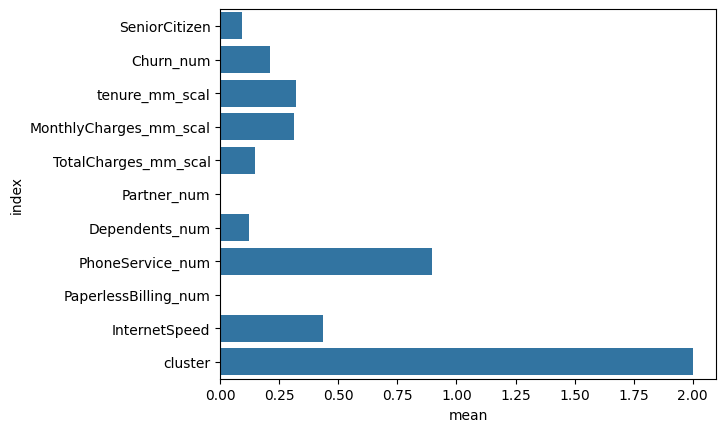

In [95]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
sns.barplot(data=for_plot, x='mean', y='index')

<Axes: xlabel='mean', ylabel='index'>

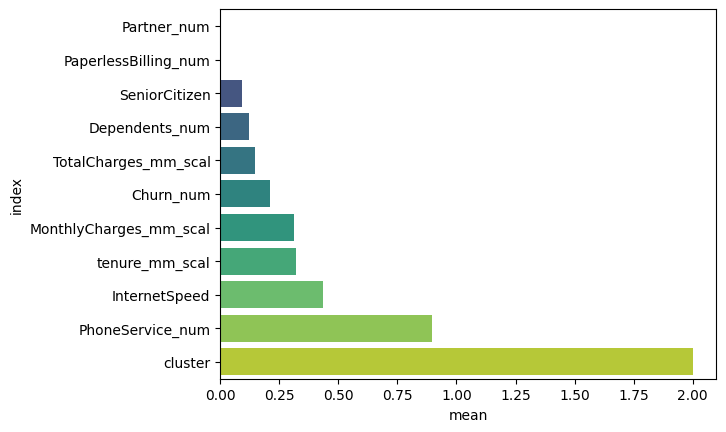

In [96]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index',  palette='viridis', hue='index')

<Axes: xlabel='mean', ylabel='index'>

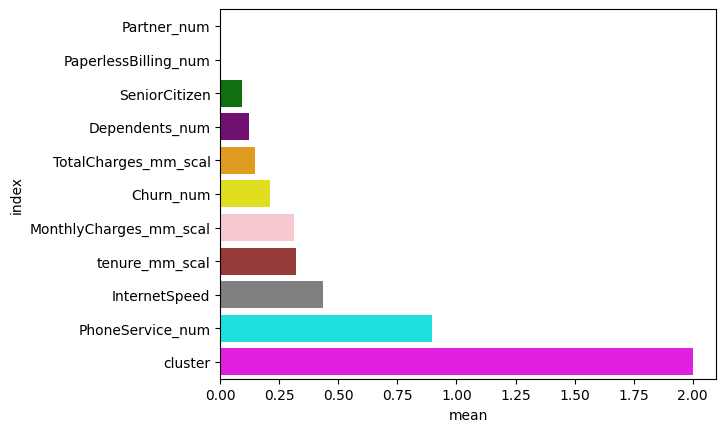

In [97]:
for_plot = df.loc[df['cluster'] == 2].describe().T['mean'].reset_index()
# 색상을 리스트로 직접 지정하는 경우
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index',  palette=colors, hue='index')

In [98]:
# 이탈률이 가장 높은 그룹(1)의 특성
df.loc[df['cluster'] == 1].describe().T['mean'].reset_index()

,index,mean
0,SeniorCitizen,0.035913
1,Churn_num,0.097833
2,tenure_mm_scal,0.549656
3,MonthlyCharges_mm_scal,0.271444
4,TotalCharges_mm_scal,0.219185
5,Partner_num,0.994427
6,Dependents_num,0.741176
7,PhoneService_num,0.865015
8,PaperlessBilling_num,0.243344
9,InternetSpeed,0.321053


<Axes: xlabel='mean', ylabel='index'>

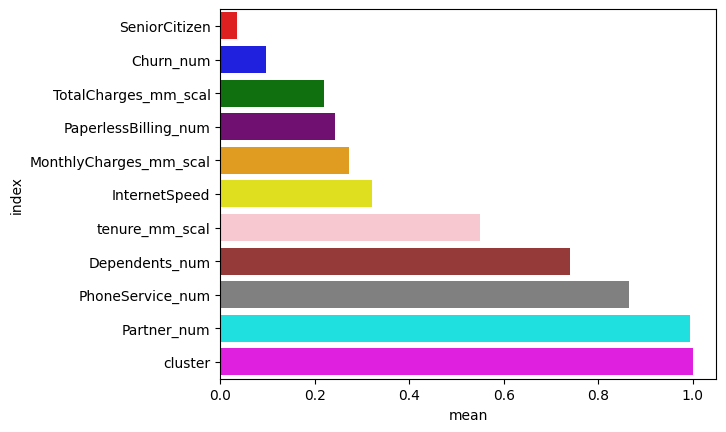

In [99]:
for_plot = df.loc[df['cluster'] == 1].describe().T['mean'].reset_index()
# 색상을 리스트로 직접 지정하는 경우
colors = ['red', 'blue', 'green', 'purple', 'orange', 'yellow', 'pink', 'brown', 'gray', 'cyan', 'magenta']
sns.barplot(data=for_plot.sort_values(by='mean'), x='mean', y='index',  palette=colors, hue='index')

### 그룹화 할 때, 군집의 개수를 지정하는 방법
- 군집의 개수를 미리 알고 있는 경우
- 실루엣 지표 등 이상적인 그룹과 그렇지 않은 그룹일 때 수치값 비교가 가능한 평가지표를 이용
- 그래프를 그려서 확인(scree plot, elbow method)

In [ ]:
from sklearn.metrics import silhouette_score as sil
# 군집이 잘 나누어졌다 수치로 평가

In [101]:
df.columns

Index(['SeniorCitizen', 'Churn_num', 'tenure_mm_scal',
       'MonthlyCharges_mm_scal', 'TotalCharges_mm_scal', 'Partner_num',
       'Dependents_num', 'PhoneService_num', 'PaperlessBilling_num',
       'InternetSpeed', 'cluster'],
      dtype='object')

In [102]:
model = KMeans(n_clusters=3)
features = ['TotalCharges_mm_scal', 'tenure_mm_scal', 'MonthlyCharges_mm_scal']
model.fit(df[features])

KMeans(n_clusters=3)

In [103]:
sil_score = sil(df[features], model.labels_)
sil_score

np.float64(0.44731890029953264)

In [104]:
score_ls = []

for i in range(2, 10):
    model = model = KMeans(n_clusters=i)
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    score_dict = {'num_cluster': i, 'sil': sil_score}
    score_ls.append(score_dict)

In [105]:
score_df = pd.DataFrame(score_ls)
score_df.sort_values(by='sil', ascending=False)

,num_cluster,sil
2,4,0.469929
0,2,0.464906
1,3,0.447362
3,5,0.446358
4,6,0.429716
7,9,0.426933
5,7,0.423134
6,8,0.419456


In [106]:
model

KMeans(n_clusters=9)

In [ ]:
# 작을수록 데이터들이 자기 군집 중심에 가깝다
# 클수록 데이터가 흩어져 있다
model.inertia_     # elbow 값

155.77255527847362

In [108]:
score_ls = []

for i in range(2, 10):
    model = model = KMeans(n_clusters=i)
    model.fit(df[features])
    sil_score = sil(df[features], model.labels_)
    elbow_score = model.inertia_ 
    score_dict = {'num_cluster': i, 'sil': sil_score, 'elbow': elbow_score}
    score_ls.append(score_dict)

In [109]:
score_df = pd.DataFrame(score_ls)
score_df.sort_values(by='sil', ascending=False)

,num_cluster,sil,elbow
2,4,0.470134,380.995242
0,2,0.464464,918.692981
3,5,0.446358,289.902538
1,3,0.445365,596.708102
4,6,0.429626,252.290379
5,7,0.423134,206.156573
7,9,0.418146,154.239120
6,8,0.417382,178.750483


<Axes: xlabel='num_cluster', ylabel='elbow'>

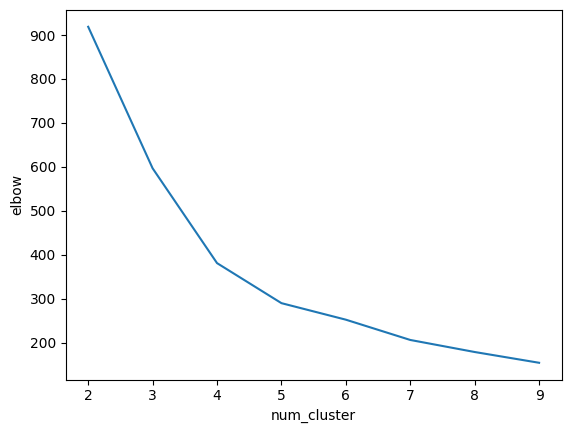

In [ ]:
sns.lineplot(data=score_df, x='num_cluster', y='elbow')
# 엘보우포인트 찾기

# 차원 축소(Dimentionality Reduction)

- feature의 개수를 줄이는 것이지만 feature selection과는 의미가 다름
- 차원 축소를 하면 feature가 더 이상 feature의 의미를 갖지 않음
- 만약 원본 데이터가 100개의 column이 있다면? 이 데이터의 정보를 전부(100%) 표현하기 위해 
  100개의 column이 필요한데, 차원 축소 개념을 이용하면 10개 미만(80~90%)으로 정보 표현이 가능함.
  100개 중에서 중요한 몇 개를 선택해서 사용하는 것이 아니라 100개를 조금씩 조합해 새로운 feature를 만들어 내는 것,
  데이터 안의 정보를 최대한 유지하면서 column의 개수가 100개라면 n개로 줄어들게 함 -> 기존 column의 정보나 특성이 사라지게 됨
- 알고리즘: 주성분분석(PCA: principal component analysis)


In [ ]:
from sklearn.decomposition import PCA
# 주성분 분석

In [112]:
df[features]

,TotalCharges_mm_scal,tenure_mm_scal,MonthlyCharges_mm_scal
0,0.003437,0.013889,0.115423
1,0.217564,0.472222,0.385075
2,0.012453,0.027778,0.354229
3,0.211951,0.625000,0.239303
4,0.017462,0.027778,0.521891
...,...,...,...
7038,0.229194,0.333333,0.662189
7039,0.847792,1.000000,0.845274
7040,0.039892,0.152778,0.112935
7041,0.035303,0.055556,0.558706


In [113]:
model = PCA(n_components=2)

In [114]:
model.fit_transform(df[features])

array([[-0.60244755, -0.04916774],
       [-0.04497465, -0.07852098],
       [-0.48156688,  0.13993128],
       ...,
       [-0.48735087, -0.12847271],
       [-0.35844862,  0.29342902],
       [ 0.80414311,  0.09053842]], shape=(7043, 2))

In [115]:
pd.DataFrame(model.fit_transform(df[features]), columns=['PC1', 'PC2'])

,PC1,PC2
0,-0.602448,-0.049168
1,-0.044975,-0.078521
2,-0.481567,0.139931
3,-0.008327,-0.285267
4,-0.404143,0.278166
...,...,...
7038,-0.010245,0.228730
7039,0.884845,0.025555
7040,-0.487351,-0.128473
7041,-0.358449,0.293429


In [116]:
pd.DataFrame(model.components_, columns=features)

# PC1 = (0.57 * otalCharges_mm_scal) + (0.68 * tenure_mm_scal) + (0.44 * MonthlyCharges_mm_scal)
# PC2 = (-0.03 * otalCharges_mm_scal) + (0.56 * tenure_mm_scal) + (-0.82 * MonthlyCharges_mm_scal)

,TotalCharges_mm_scal,tenure_mm_scal,MonthlyCharges_mm_scal
0,0.576909,0.685236,0.444554
1,0.038130,-0.566257,0.823346


### PCA 수학적 설명

- column끼리 공분산 구해서 공분산 행렬을 구함 - df[features].cov()
- 고유값, 고유벡터를 정방행렬에 뽑아낼 수 있음
- 고유값의 크기 순으로 정렬할 수 있음
- 크기가 가장 큰 고유값부터 정렬하면 순서를 가짐
- 고유값과 고유벡터는 한 쌍으로 있음
- 고유벡터 크기가 큰 것부터 작은 것 순서대로 PC1, PC2, ...으로 이름을 붙임


### 거리 (Distance)
- euclidean, minkowski, manhattan

In [117]:
import seaborn as sns

In [118]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [119]:
set(df['species'])

{'setosa', 'versicolor', 'virginica'}

In [120]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [121]:
features = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
X = df[features]
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [122]:
X.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
from sklearn.preprocessing import StandardScaler
# StandardScaler: 정규화를 한다다

In [124]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [125]:
pd.DataFrame(X_scaled, columns=features).describe()

,sepal_length,sepal_width,petal_length,petal_width
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,-4.736952e-16,-7.815970e-16,-4.263256e-16,-4.736952e-16
std,1.003350e+00,1.003350e+00,1.003350e+00,1.003350e+00
min,-1.870024e+00,-2.433947e+00,-1.567576e+00,-1.447076e+00
25%,-9.006812e-01,-5.923730e-01,-1.226552e+00,-1.183812e+00
50%,-5.250608e-02,-1.319795e-01,3.364776e-01,1.325097e-01
75%,6.745011e-01,5.586108e-01,7.627583e-01,7.906707e-01
max,2.492019e+00,3.090775e+00,1.785832e+00,1.712096e+00


In [126]:
from scipy.spatial.distance import pdist, squareform

In [ ]:
# squareform(): 1차원 배열을 2차원 대칭 행렬로 변환
# 수치가 비슷하면 - 거리가 짧음 - 같은 품종일 가능성 높음
# 수치가 크면 - 거리도 멀음 - 다른 품종일 가능성 높음
row_dist = pd.DataFrame(squareform(pdist(X_scaled, metric='euclidean')))
row_dist

,0,1,2,3,4,5,6,7,8,9,...,140,141,142,143,144,145,146,147,148,149
0,0.000000,1.176219,0.845607,1.103685,0.260139,1.038444,0.661331,0.266276,1.620821,0.962877,...,4.323335,4.203388,3.679790,4.347745,4.371458,4.170050,4.075223,3.805412,3.826157,3.335064
1,1.176219,0.000000,0.523373,0.434000,1.386485,2.181206,0.998654,0.930463,0.648099,0.271197,...,4.346806,4.241393,3.331094,4.437906,4.513641,4.130727,3.660136,3.746638,4.017345,3.213476
2,0.845607,0.523373,0.000000,0.283891,0.991572,1.853897,0.497194,0.597511,0.782483,0.376784,...,4.503900,4.411912,3.574016,4.577287,4.620161,4.317340,3.973046,3.936541,4.072716,3.380336
3,1.103685,0.434000,0.283891,0.000000,1.250160,2.100774,0.705317,0.843695,0.523373,0.386603,...,4.504592,4.426571,3.486580,4.588504,4.642323,4.311771,3.887869,3.922954,4.097587,3.340154
4,0.260139,1.386485,0.991572,1.250160,0.000000,0.900113,0.681319,0.463889,1.767789,1.166192,...,4.433129,4.323032,3.829088,4.448334,4.456354,4.296127,4.252915,3.935711,3.890518,3.457620
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,4.170050,4.130727,4.317340,4.311771,4.296127,4.121389,4.349495,4.141813,4.486161,4.197460,...,0.349293,0.339039,1.395203,0.620434,0.791824,0.000000,1.360083,0.463325,1.108067,1.173044
146,4.075223,3.660136,3.973046,3.887869,4.252915,4.357976,4.142182,3.967153,3.916907,3.789007,...,1.640744,1.648230,0.763043,1.871492,2.099612,1.360083,0.000000,1.189008,2.153099,1.257071
147,3.805412,3.746638,3.936541,3.922954,3.935711,3.802866,3.977470,3.766660,4.099560,3.806455,...,0.663805,0.668634,1.103120,0.811378,1.024490,0.463325,1.189008,0.000000,1.071844,0.775292
148,3.826157,4.017345,4.072716,4.097587,3.890518,3.597498,3.982224,3.830008,4.346450,4.032118,...,0.934989,1.106974,1.771370,0.906236,0.720010,1.108067,2.153099,1.071844,0.000000,1.200930


In [128]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

In [ ]:
# 최장 연결법
# linkage(): 데이터 간 쌍별 거리를 계산해서 비슷한 샘플부터 차례로 병합해가는 과정 수치 표현
cluster1 = linkage(y=X_scaled, method='complete')
cluster1[:5]

array([[1.01000000e+02, 1.42000000e+02, 0.00000000e+00, 2.00000000e+00],
       [7.00000000e+00, 3.90000000e+01, 1.21167870e-01, 2.00000000e+00],
       [1.00000000e+01, 4.80000000e+01, 1.21167870e-01, 2.00000000e+00],
       [9.00000000e+00, 3.40000000e+01, 1.31632184e-01, 2.00000000e+00],
       [0.00000000e+00, 1.70000000e+01, 1.31632184e-01, 2.00000000e+00]])

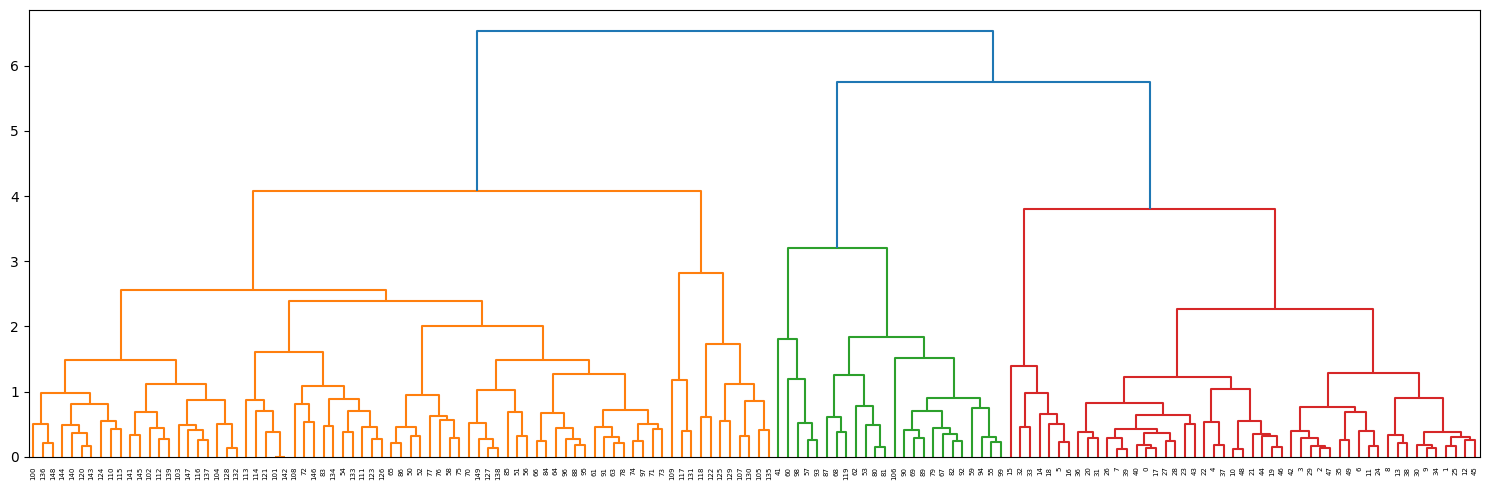

In [ ]:
# dendrogram(): 군집화된 순서를 트리 구조로 보여준다.
plt.figure(figsize=(15, 5))
dendrogram(cluster1)
plt.tight_layout()

In [131]:
from scipy.cluster.hierarchy import fcluster
import numpy as np

In [ ]:
# linkage()로 계산된 병합 정보를 기준으로 실제 데이터에 군집 번호를 할당
df['cluster1'] = fcluster(cluster1, t=5, criterion='distance')
set(df['cluster1'])

{1, 2, 3}

In [133]:
df['cluster1'].value_counts()

cluster1
1    77
3    49
2    24
Name: count, dtype: int64

In [134]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

In [135]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species',
       'cluster1'],
      dtype='object')

In [136]:
interested = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'cluster1']
df[interested].groupby('cluster1').mean()

,sepal_length,sepal_width,petal_length,petal_width
cluster1,,,,
1,6.472727,2.990909,5.183117,1.815584
2,5.512500,2.466667,3.866667,1.170833
3,5.016327,3.451020,1.465306,0.244898


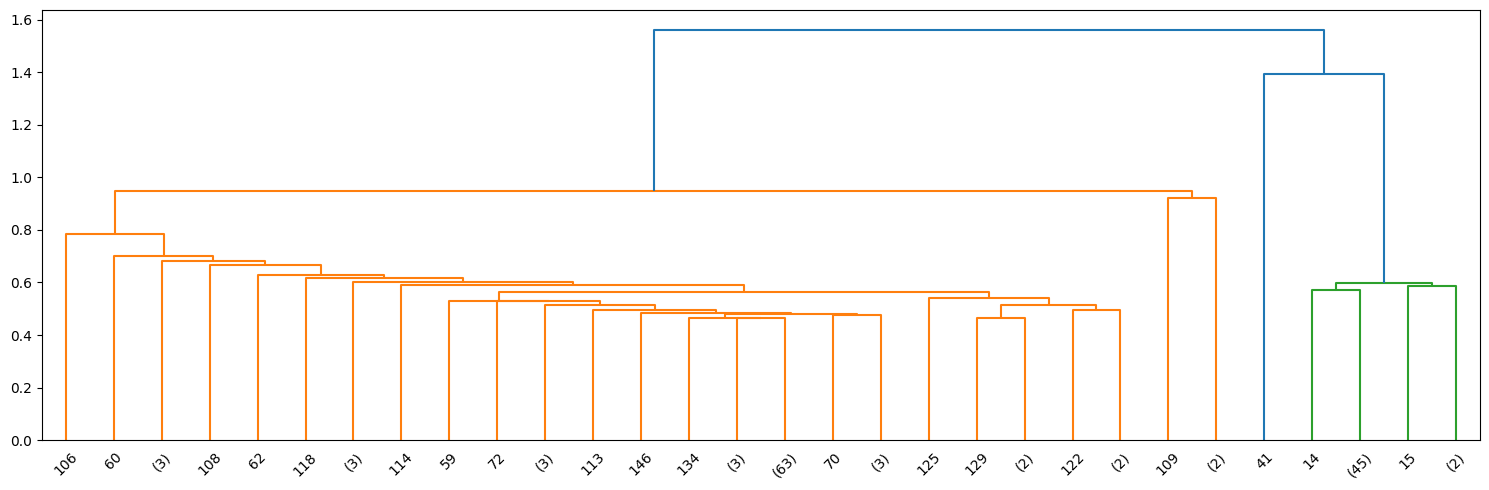

In [ ]:
cluster2 = linkage(y=X_scaled, method='single', metric='euclidean')
plt.figure(figsize=(15, 5))
# truncate_mode='lastp'
dendrogram(cluster2, truncate_mode='lastp')
plt.tight_layout()
plt.show()

In [138]:
df['cluster2'] = fcluster(cluster2, t=1.2, criterion='distance')
df['cluster2'].value_counts()

cluster2
1    100
2     49
3      1
Name: count, dtype: int64

In [139]:
df[df['cluster2'] == 3]

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1,cluster2
41,4.5,2.3,1.3,0.3,setosa,2,3


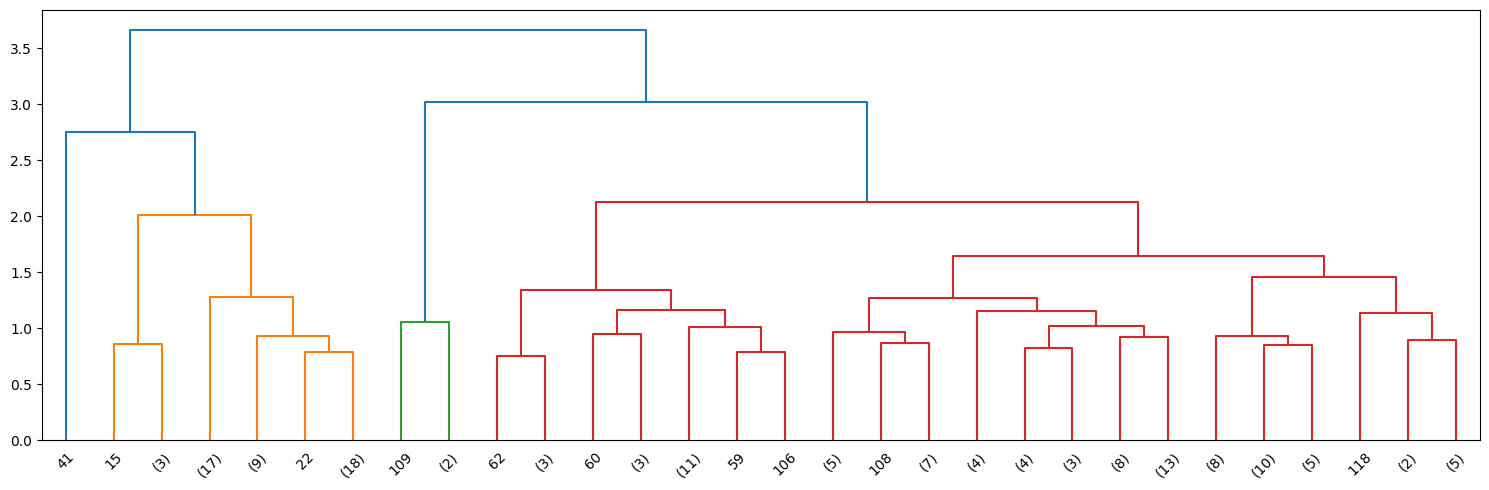

In [140]:
# 평균 연결법
cluster3 = linkage(y=X_scaled, method='average', metric='euclidean')
plt.figure(figsize=(15, 5))
dendrogram(cluster3, truncate_mode='lastp')
plt.tight_layout()
plt.show()

In [ ]:
# t = 3.0으로 거리 기준 잡기
df['cluster3'] = fcluster(cluster3, t=3.0, criterion='distance')
df['cluster3'].value_counts()

cluster3
3    97
1    50
2     3
Name: count, dtype: int64

### K-Means
1. 무작위로 k개의 초기 군집 중심(centroid)을 정함
2. 각 샘플에서 가장 가까운 군집 중심을 찾아 해당 군집의 샘플로 지정
3. 각 군집에 속한 샘프의 평균값으로 군집의 중심을 변경함
4. 군집의 중심에 변화가 없을때까지 반복

<img src="k-means_images.png">

In [142]:
from sklearn.cluster import KMeans

In [ ]:
# 중심점 초기화에 쓰이는 랜덤 시드를 고정 -> 결과 재현 가능
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X_scaled)

KMeans(n_clusters=3, random_state=0)

In [ ]:
# 최종적으로 계산된 3개의 중심점 좌표를 반환
kmeans.cluster_centers_

array([[-0.05021989, -0.88337647,  0.34773781,  0.2815273 ],
       [-1.01457897,  0.85326268, -1.30498732, -1.25489349],
       [ 1.13597027,  0.08842168,  0.99615451,  1.01752612]])

In [145]:
set(kmeans.predict(X_scaled))

{np.int32(0), np.int32(1), np.int32(2)}

In [146]:
df['kmeans'] = kmeans.predict(X_scaled)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,cluster1,cluster2,cluster3,kmeans
0,5.1,3.5,1.4,0.2,setosa,3,2,1,1
1,4.9,3.0,1.4,0.2,setosa,3,2,1,1
2,4.7,3.2,1.3,0.2,setosa,3,2,1,1
3,4.6,3.1,1.5,0.2,setosa,3,2,1,1
4,5.0,3.6,1.4,0.2,setosa,3,2,1,1


In [147]:
df['kmeans'].value_counts()

kmeans
0    53
1    50
2    47
Name: count, dtype: int64

In [148]:
# df.groupby(lmeans').mean()

In [149]:
from sklearn.datasets import make_moons

In [153]:
# 두 개의 반달 모양 데이터셋을 생성합니다.
# n_samples=300: 총 300개의 점 (반달 2개 = 150 + 150)
# noise=0.05: 약간의 노이즈(흐트러짐)를 추가해서 현실감 있는 데이터로 만듦

x, y = make_moons(n_samples=300, noise=0.05, random_state=0)
moons_df = pd.DataFrame(x, columns=['c1', 'c2'])
moons_df

,c1,c2
0,0.715413,-0.494089
1,0.246789,-0.240091
2,0.943261,0.346800
3,0.973742,-0.492901
4,1.239713,-0.411411
...,...,...
295,1.530635,-0.311922
296,0.275923,-0.259083
297,-0.742257,0.541587
298,0.570287,0.921368


<Axes: xlabel='c1', ylabel='c2'>

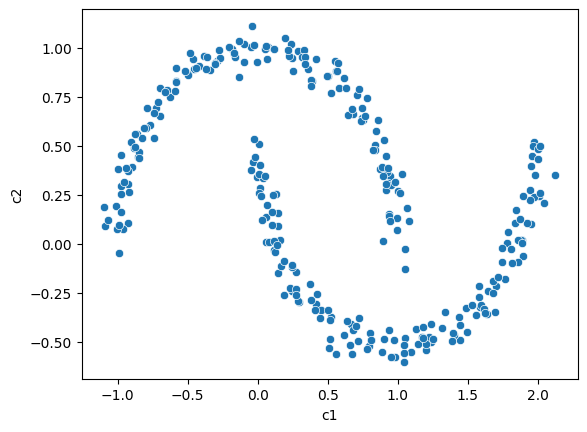

In [154]:
sns.scatterplot(data=moons_df, x='c1', y='c2')

In [155]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(moons_df)

KMeans(n_clusters=2, random_state=0)

In [156]:
kmeans.labels_

array([1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0], d

In [157]:
moons_df['kmeans'] = kmeans.labels_
moons_df

,c1,c2,kmeans
0,0.715413,-0.494089,1
1,0.246789,-0.240091,0
2,0.943261,0.346800,1
3,0.973742,-0.492901,1
4,1.239713,-0.411411,1
...,...,...,...
295,1.530635,-0.311922,1
296,0.275923,-0.259083,0
297,-0.742257,0.541587,0
298,0.570287,0.921368,0


In [ ]:
moons_df['kmeans'].value_counts()

kmeans
0    153
1    147
Name: count, dtype: int64

<Axes: xlabel='c1', ylabel='c2'>

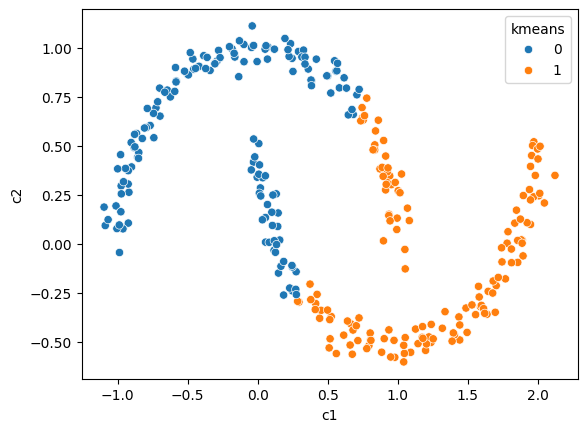

In [ ]:
sns.scatterplot(data=moons_df, x='c1', y='c2', hue='kmeans')

### 밀도 기반 분석(DBSCAN)
- Density-Based Spatial Clustering of applications with Noise

1. 하나의 샘플을 중심으로 반경(eps) 내에 최소 샘플보다 이상의 샘플이 있으면, 하나의 군집으로 판단 -> 하나의 샘플은 core가 됨
2. 반경 내에 샘플이 3개 뿐이므로 core가 되진 않지만 Core1의 군집에 포함된 샘플이므로 이는 Border가 됨
3. 1번 마찬가지로 core가 됨
4. 반경 내의 샘플 중에서 Core1이 포함되어 있어서 군집을 연결해 하나의 군집으로 묶임


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# DBSCAN: 밀도 기반의 군집화 알고리즘 
dbscan = DBSCAN(eps=0.3, min_samples=5)
dbscan.fit(moons_df[['c1', 'c2']])

DBSCAN(eps=0.3)

In [ ]:
moons_df['dbscan'] = dbscan.labels_
moons_df

,c1,c2,kmeans,dbscan
0,0.715413,-0.494089,1,0
1,0.246789,-0.240091,0,0
2,0.943261,0.346800,1,1
3,0.973742,-0.492901,1,0
4,1.239713,-0.411411,1,0
...,...,...,...,...
295,1.530635,-0.311922,1,0
296,0.275923,-0.259083,0,0
297,-0.742257,0.541587,0,1
298,0.570287,0.921368,0,1


In [ ]:
moons_df['dbscan'].value_counts()

dbscan
0    150
1    150
Name: count, dtype: int64

<Axes: xlabel='c1', ylabel='c2'>

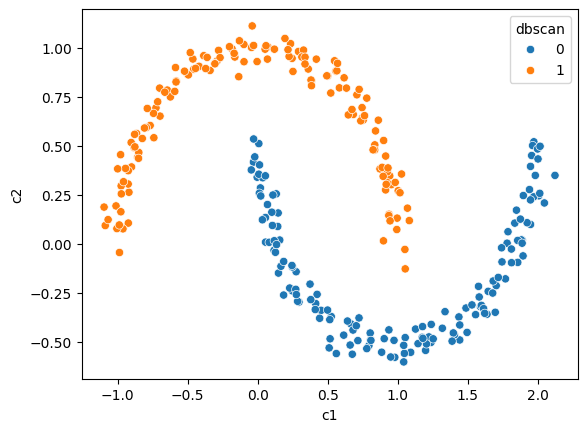

In [ ]:
sns.scatterplot(data=moons_df, x='c1', y='c2', hue='dbscan')

<img src="dbscan_image.png">

### 왜 Kmeans로는 잘 안되었을까?

- centroid -> 평균값에 의해 갱신되는 특징이 있음 -> 기하학적인 특징을 가진 데이터나 이상치가 있다면 -> 왜곡된 결과를 초래할 가능성이 높음


In [ ]:
centroids=kmeans.cluster_centers_
centroids

array([[-0.19487562,  0.56237054],
       [ 1.21103672, -0.08629526]])

<Axes: xlabel='c1', ylabel='c2'>

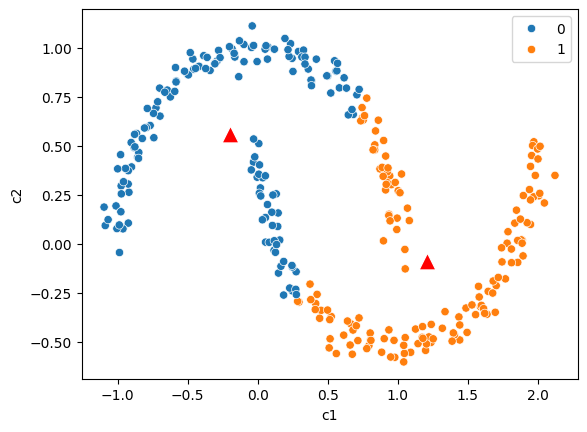

In [ ]:
sns.scatterplot(data=moons_df, x='c1', y='c2', hue='kmeans')
sns.scatterplot(x=centroids[:,0], y=centroids[:,1], marker='^', color='r', s=150)